In [1]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.8.0'

#### Load Image Data

In [2]:
DATA_LIST = os.listdir('two/train')
DATASET_PATH  = 'two/train'
TEST_DIR =  'two/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 50
LEARNING_RATE = 0.0005 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')

train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=False,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="binary")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=False,batch_size=BATCH_SIZE,
                                                  subset = "validation",seed=42,
                                                  class_mode="binary")

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


C:\Users\rexzo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras_preprocessing\image\image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import applications 
from tensorflow.keras import optimizers
from tensorflow.keras import losses

conv_base=applications.VGG16(include_top=False,weights="imagenet",input_shape=(224,224,3))
conv_base.trainable=False
model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten(name='feature_dense'))
model.add(layers.Dense(1024,activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 feature_dense (Flatten)     (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 1)                 6

In [5]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=LEARNING_RATE),
                loss='binary_crossentropy',
                metrics=['acc'])

C:\Users\rexzo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [6]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))
STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size
history=model.fit(train_batches,steps_per_epoch=STEP_SIZE_TRAIN,validation_steps=STEP_SIZE_VALID,epochs=NUM_EPOCHS,validation_data=valid_batches,verbose=1)

16
4
Epoch 1/50


C:\Users\rexzo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\rexzo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras_preprocessing\image\image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


16/16 [==============================] - 14s 832ms/step - loss: 1.7567 - acc: 0.6875 - val_loss: 0.9333 - val_acc: 0.5000
Epoch 2/50
16/16 [==============================] - 13s 819ms/step - loss: 1.2250 - acc: 0.5375 - val_loss: 1.5314 - val_acc: 0.5000
Epoch 3/50
16/16 [==============================] - 13s 822ms/step - loss: 1.1122 - acc: 0.4000 - val_loss: 0.6097 - val_acc: 0.5500
Epoch 4/50
16/16 [==============================] - 13s 844ms/step - loss: 0.9191 - acc: 0.5063 - val_loss: 0.6391 - val_acc: 0.5000
Epoch 5/50
16/16 [==============================] - 14s 860ms/step - loss: 0.6968 - acc: 0.6750 - val_loss: 0.7237 - val_acc: 0.5000
Epoch 6/50
16/16 [==============================] - 13s 798ms/step - loss: 0.8946 - acc: 0.5063 - val_loss: 0.6972 - val_acc: 0.5000
Epoch 7/50
16/16 [==============================] - 13s 800ms/step - loss: 0.6367 - acc: 0.6562 - val_loss: 0.4833 - val_acc: 0.8000
Epoch 8/50
16/16 [==============================] - 13s 798ms/step - loss: 0.795

#### [5 points] Plot Accuracy and Loss During Training

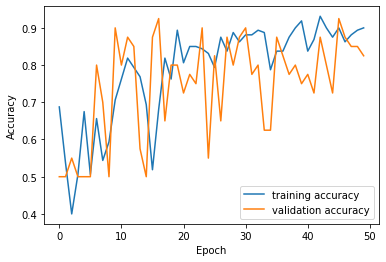

In [7]:
e_arr=list(range(1,51))
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

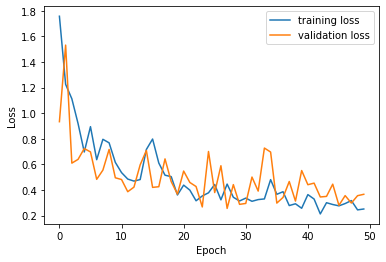

In [8]:
e_arr=list(range(1,51))
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

#### Plot Test Results

Found 60 images belonging to 2 classes.


C:\Users\rexzo\AppData\Local\Temp\ipykernel_23440\3278958914.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(eval_generator,18,verbose=1)


18/18 [==============================] - 2s 80ms/step
covid\6_Rahimzadeh_137covid_patient15_SR_4_IM00005.png


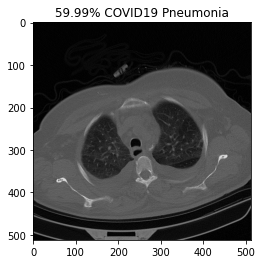

covid\6_Rahimzadeh_137covid_patient15_SR_4_IM00006.png


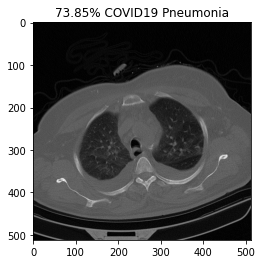

covid\6_Rahimzadeh_137covid_patient15_SR_4_IM00007.png


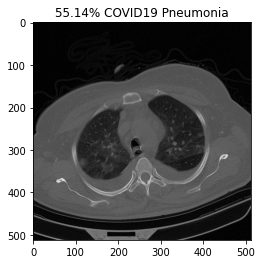

covid\6_Rahimzadeh_137covid_patient15_SR_4_IM00008.png


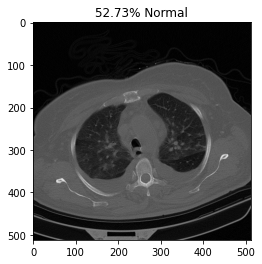

covid\6_Rahimzadeh_137covid_patient15_SR_4_IM00009.png


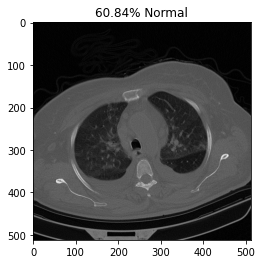

covid\6_Rahimzadeh_137covid_patient15_SR_4_IM00010.png


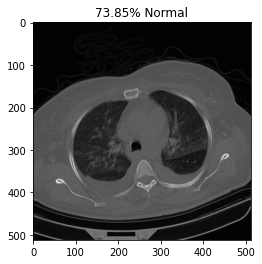

covid\6_Rahimzadeh_137covid_patient15_SR_4_IM00011.png


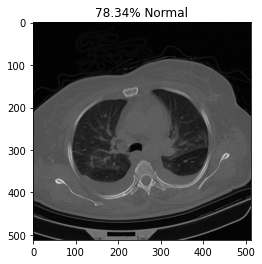

covid\6_Rahimzadeh_137covid_patient15_SR_4_IM00012.png


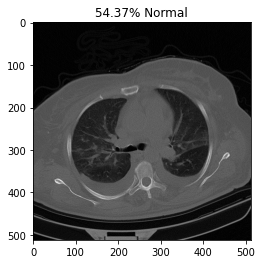

covid\6_Rahimzadeh_137covid_patient15_SR_4_IM00013.png


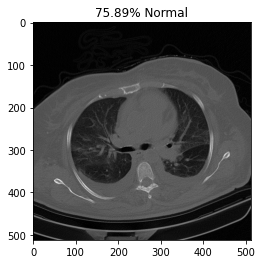

covid\6_Rahimzadeh_137covid_patient92_SR_4_IM00060.png


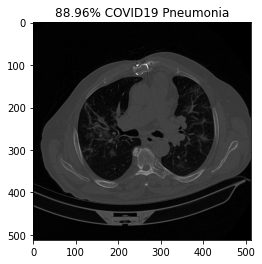

covid\6_Rahimzadeh_137covid_patient92_SR_4_IM00061.png


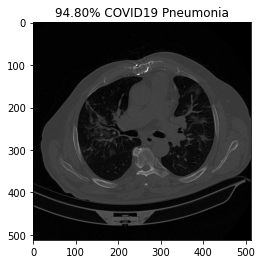

covid\6_Rahimzadeh_137covid_patient92_SR_4_IM00062.png


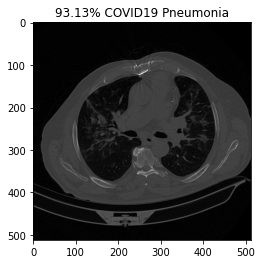

covid\6_Rahimzadeh_137covid_patient92_SR_4_IM00063.png


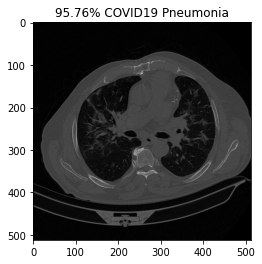

covid\6_Rahimzadeh_137covid_patient92_SR_4_IM00064.png


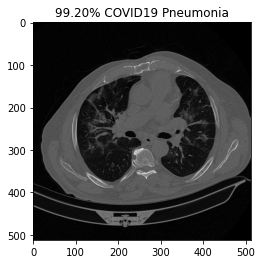

covid\6_Rahimzadeh_137covid_patient92_SR_4_IM00065.png


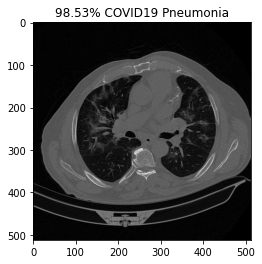

covid\6_Rahimzadeh_137covid_patient92_SR_4_IM00066.png


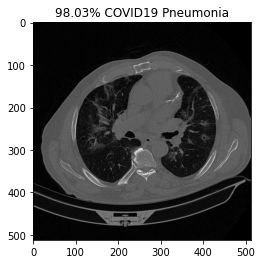

covid\6_Rahimzadeh_137covid_patient92_SR_4_IM00067.png


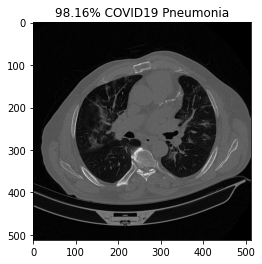

covid\6_Rahimzadeh_137covid_patient92_SR_4_IM00068.png


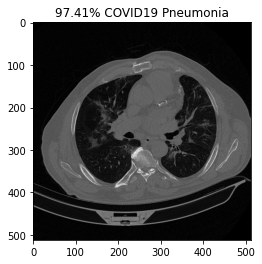

In [9]:
import matplotlib.image as mpimg

test_datagen = ImageDataGenerator(rescale=1. / 255)
eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="binary")
eval_generator.reset()
pred = model.predict_generator(eval_generator,18,verbose=1)
for index, probability in enumerate(pred):
    image_path = TEST_DIR + "/" +eval_generator.filenames[index]
    image = mpimg.imread(image_path)
    if image.ndim < 3:
        image = np.reshape(image,(image.shape[0],image.shape[1],1))
        image = np.concatenate([image, image, image], 2)
#         print(image.shape)

    pixels = np.array(image)
    plt.imshow(pixels)
    
    print(eval_generator.filenames[index])
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% Normal")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% COVID19 Pneumonia")
    plt.show()

In [10]:
from sklearn.manifold import TSNE

intermediate_layer_model = models.Model(inputs=model.input,
                                        outputs=model.get_layer('feature_dense').output)
tsne_data_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="binary")

Found 200 images belonging to 2 classes.


In [11]:
X_predicted=intermediate_layer_model.predict(tsne_data_generator)

In [12]:
X_embedded = TSNE(n_components=2).fit_transform(X_predicted)

C:\Users\rexzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\rexzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


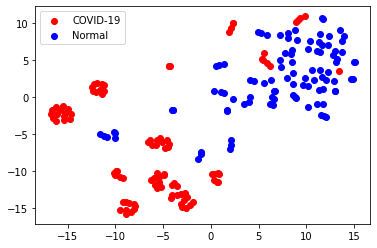

In [13]:
for i in range(len(tsne_data_generator)):
    if tsne_data_generator[i][1]==0.0:
        s1=plt.scatter(X_embedded[i, 0], X_embedded[i, 1],c='r')
    else:
        s2=plt.scatter(X_embedded[i, 0], X_embedded[i, 1],c='b')

plt.legend((s1,s2),('COVID-19','Normal') ,loc = 'best')
plt.show()

<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->